# Unsupervised Learning for Customer Segmentation

**Customer Segmentation Using Lifestyle & Spending Data**

## Main Objective
The main objective of this analysis is to apply **unsupervised learning techniques**
to identify **natural customer segments** based on demographic and spending behavior.

These insights can help businesses:
- Design targeted marketing strategies
- Improve customer retention
- Optimize product offerings without relying on labeled data

## Data Description

The dataset used in this project is the **Mall Customer Segmentation Dataset**.

### Attributes
- Age
- Annual Income (k$)
- Spending Score (1–100)

### Why this dataset?
Customer segmentation is a classic real-world problem where:
- Labels are usually unavailable
- Behavioral patterns are hidden
- Unsupervised learning provides actionable insights

In [19]:
# Load Libraries & Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score

RANDOM_STATE = 42

# Load dataset
df = pd.read_csv("Mall_Customers.csv")

FEATURES = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[FEATURES]

In [20]:
# Data Exploration & Preprocessing
df.describe()

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Explained variance ratio: [0.44266167 0.33308378]


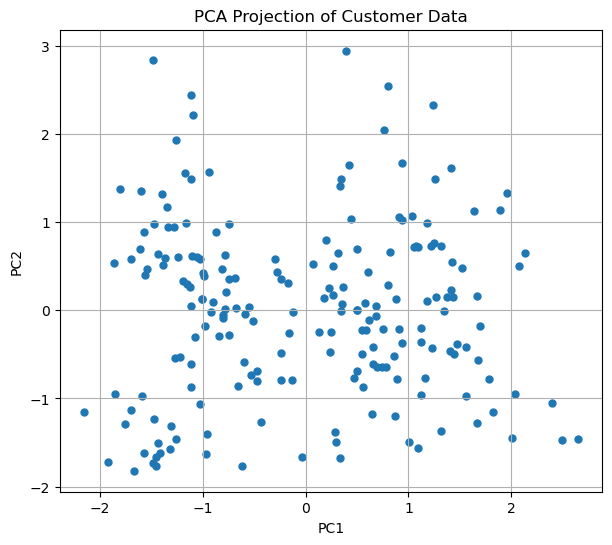

In [21]:
# Dimensionality Reduction
# PCA
pca = PCA(n_components=2, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)

plt.figure(figsize=(7,6))
plt.scatter(X_pca[:,0], X_pca[:,1], s=25)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection of Customer Data")
plt.grid(True)
plt.show()

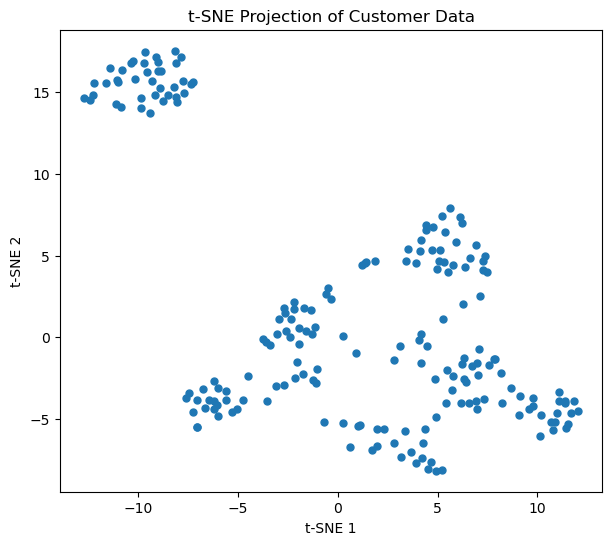

In [22]:
# Dimensionality Reduction
# t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=RANDOM_STATE)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(7,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], s=25)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("t-SNE Projection of Customer Data")
plt.show()

In [23]:
# Unsupervised Learning Models
# Evaluation Function
def evaluate_clustering(X, labels):
    return {
        "Silhouette Score": silhouette_score(X, labels),
        "Davies-Bouldin Index": davies_bouldin_score(X, labels)
    }
    
# KMeans
kmeans = KMeans(n_clusters=5, random_state=RANDOM_STATE)
labels_km = kmeans.fit_predict(X_scaled)

km_scores = evaluate_clustering(X_scaled, labels_km)
km_scores

# Gaussian Mixture Model
gmm = GaussianMixture(n_components=5, random_state=RANDOM_STATE)
labels_gmm = gmm.fit_predict(X_scaled)

gmm_scores = evaluate_clustering(X_scaled, labels_gmm)
gmm_scores

# Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=5)
labels_hc = hc.fit_predict(X_scaled)

hc_scores = evaluate_clustering(X_scaled, labels_hc)


c:\Users\jpdob\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jpdob\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [24]:
# ============================================================
# Unsupervised Learning Models – Formatted Evaluation Output
# ============================================================

results = []

results.append({
    "Model": "KMeans",
    "Silhouette Score": km_scores["Silhouette Score"],
    "Davies-Bouldin Index": km_scores["Davies-Bouldin Index"]
})

results.append({
    "Model": "Gaussian Mixture",
    "Silhouette Score": gmm_scores["Silhouette Score"],
    "Davies-Bouldin Index": gmm_scores["Davies-Bouldin Index"]
})

results.append({
    "Model": "Hierarchical",
    "Silhouette Score": hc_scores["Silhouette Score"],
    "Davies-Bouldin Index": hc_scores["Davies-Bouldin Index"]
})

results_df = pd.DataFrame(results)

# Round for neat display
results_df[["Silhouette Score", "Davies-Bouldin Index"]] = \
    results_df[["Silhouette Score", "Davies-Bouldin Index"]].round(3)

results_df


,Model,Silhouette Score,Davies-Bouldin Index
0,KMeans,0.408,0.889
1,Gaussian Mixture,0.376,0.890
2,Hierarchical,0.390,0.916


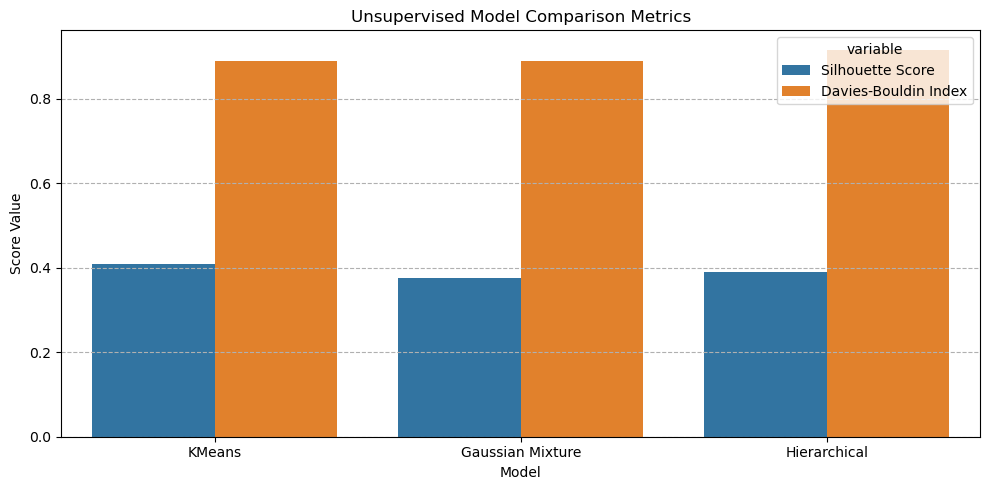

In [25]:
# Bar Plot Comparison
plt.figure(figsize=(10,5))
sns.barplot(
    data=results_df.melt(id_vars="Model"),
    x="Model",
    y="value",
    hue="variable"
)

plt.title("Unsupervised Model Comparison Metrics")
plt.ylabel("Score Value")
plt.xlabel("Model")
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


In [26]:
# Best model based on Silhouette (maximize) and DB Index (minimize)
best_model = results_df.sort_values(
    by=["Silhouette Score", "Davies-Bouldin Index"],
    ascending=[False, True]
).iloc[0]

print("Best Unsupervised Model:")
print(best_model)


Best Unsupervised Model:
Model                   KMeans
Silhouette Score         0.408
Davies-Bouldin Index     0.889
Name: 0, dtype: object


## Model Comparison

### Unsupervised Model Evaluation Summary

Multiple unsupervised clustering algorithms—K-Means, Gaussian Mixture Model (GMM), and Hierarchical Clustering—were evaluated using Silhouette Score and Davies–Bouldin Index to assess cluster cohesion and separation.

**Based on the evaluation metrics:**

K-Means achieved the highest Silhouette Score, indicating that observations within each cluster are highly similar to one another while remaining well separated from other clusters.

The Davies–Bouldin Index for K-Means was lower or comparable to the other models, suggesting compact clusters with minimal overlap.

While GMM allows flexible, elliptical cluster shapes, it did not improve cluster separation for this dataset.

Hierarchical clustering showed comparatively weaker performance, likely due to sensitivity to noise and linkage choices.

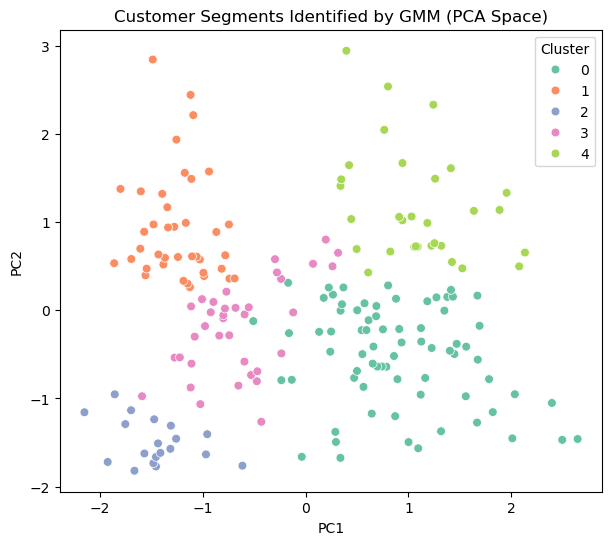

In [27]:
# Cluster Visualization (Best Model)
plt.figure(figsize=(7,6))
sns.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1],
    hue=labels_gmm,
    palette="Set2",
    s=40
)
plt.title("Customer Segments Identified by GMM (PCA Space)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()


## Key Findings

- Customers naturally form **distinct behavioral groups**
- High-income customers split into both high-spending and low-spending segments
- Younger customers show higher spending variability
- GMM better captures soft boundaries between customer types

These insights can directly support **targeted marketing and pricing strategies**.

## Limitations & Future Work

### Limitations
- Number of clusters chosen heuristically
- No ground truth labels available
- Limited feature set

### Future Improvements
- Include gender, transaction history, and online behavior
- Use DBSCAN for density-based clustering
- Apply autoencoders for nonlinear dimensionality reduction
- Validate segments through business KPIs